# Import Data

The detection of spam emails, also known as email filtering, involves identifying and separating unwanted or unsolicited email messages from legitimate ones. This is typically done using a combination of techniques such as machine learning, natural language processing, and rule-based filtering.

One common method of spam detection is the use of Bayesian filters. Bayesian filters use statistical analysis to determine the likelihood that an email is spam based on the words and phrases it contains. The filter learns from a set of known spam and non-spam emails and uses this information to classify new emails as spam or not.

In [14]:
# Import the pandas library
import pandas as pd

# Read the CSV file
df = pd.read_csv('https://codefinity-content-media-v2.s3.eu-west-1.amazonaws.com/projects/24d76e82-e376-49a2-947d-fc0e1a9b9bb7/spam_ham_dataset.csv')

# Display the first five rows
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


Another method involves the use of machine learning algorithms such as Random Forest, Neural Networks, and Support Vector Machines (SVMs) to classify emails as spam or not. These algorithms are trained on a dataset of labeled emails, and they use this training to classify new emails based on their content, sender, and other characteristics.

Rule-based filtering is another technique employed in spam detection. This method utilizes a set of predetermined rules, such as keywords or regular expressions, to identify and flag potential spam emails.

Additionally, analyzing the characteristics of the sender's address can be effective. For example, emails coming from a known spammer's address or those sent to a high number of recipients are likely to be spam.

It is worth noting that spam detection is a constantly evolving field. As spammers continually devise new methods to bypass filters, the techniques used for spam detection must also be frequently updated and refined to stay ahead of these threats.

# Columns Adjustments

In [16]:
# Remove unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Change column names
df.columns = ['label', 'text', 'class']

# Preliminary Analysis

Checking for null values and duplicates is important in the data cleaning and preparation process because this helps to ensure the quality and accuracy of the data.

 - Null values can indicate missing or incomplete data and, if not handled properly, can lead to inaccuracies in any analysis or modeling performed on the data. For example, if a null value is present in a column that is used as a predictor variable in a machine learning model, the model will not be able to predict that data point.
 - Duplicates can also lead to inaccuracies in analysis, especially if they are not identified and removed. For example, if a data point is duplicated, it will be counted twice in any analysis performed, potentially skewing the results. Additionally, duplicate data can increase the size of the dataset and slow down any analysis or modeling performed on it.

In [17]:
# Check if there are NaNs in the DataFrame
print(df.isna().sum())

# Drop the duplicates
df.drop_duplicates(inplace=True)

label    0
text     0
class    0
dtype: int64


# Plot the Target Distribution

Plotting bar charts, also known as bar plots, is a useful way to visualize data and gain insights. These charts provide a simple and effective method for comparing the relative sizes of different groups or categories of data. By employing various colors or patterns, one can easily compare each group and understand data distribution.

Bar charts also facilitate the identification of patterns or trends. For example, sorting the bars in a specific order can reveal correlations between variables. Their straightforward and readable format makes them accessible, even to those with little experience in data analysis.

Furthermore, bar charts excel in displaying comparative data. They allow for easy comparisons across different groups and over time.

Overall, bar charts are a powerful visualization tool. They enable quick identification of patterns, trends, and outliers, enhancing the decision-making process based on the analyzed data.

<Axes: xlabel='label', ylabel='count'>

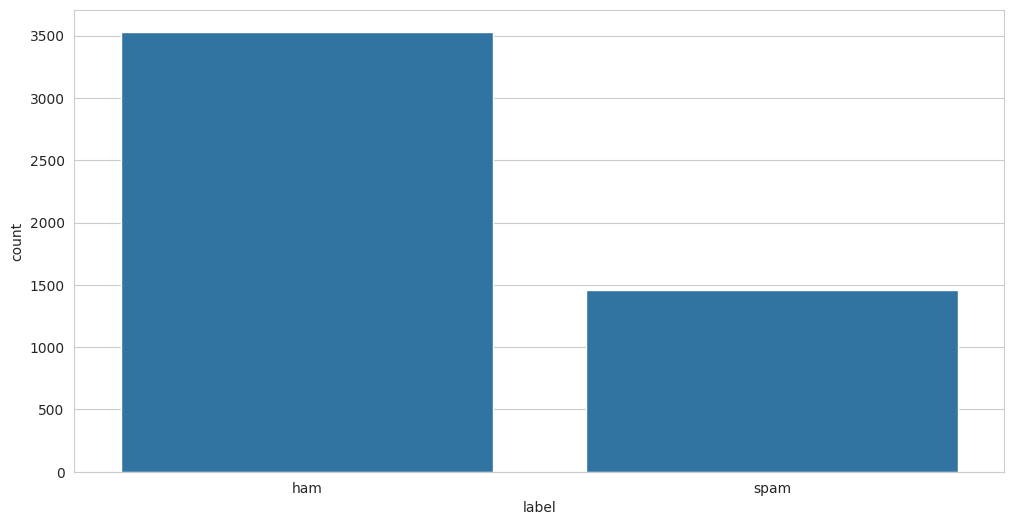

In [18]:
# Import the pyplot module
import matplotlib.pyplot as plt
# Import the seaborn library
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(data=df, x='label')

# Remove Stopwords

Removing stopwords is a common preprocessing step in natural language processing (NLP) tasks. Stopwords are words frequently used in a language, such as 'a', 'an', 'the', 'and', 'or', etc., and are considered of little value in text analysis because they carry minimal meaning on their own.

There are several reasons why removing stopwords is important:

 - Reducing dataset size: Stopwords occupy much space in the text, increasing the dataset's size. Removing them reduces the dataset's size, making it more manageable for further processing.
 - Improving processing efficiency: Common stopwords can slow down text analysis algorithms by constituting a large proportion of the text, thus making processing more computationally expensive.
 - Minimizing noise: Stopwords add noise to text analysis, obscuring meaningful insights. Eliminating them helps clarify patterns or topics in the text.
 - Reducing bias: In analyses based on word frequency, stopwords can bias the results. By removing them, the focus shifts to more meaningful words, yielding more accurate outcomes.

In [19]:
# Import the nltk library
import nltk
# Import the word_tokenize() function
from nltk.tokenize import word_tokenize
# Import stopwords
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

# Load English stop words
stop_words = set(stopwords.words('english'))

# Apply a lambda function
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x)
                                                if not word in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


X, y Using .loc[ ]

In [20]:
# Store the 'text' column
X = df.loc[:, 'text']
# Store the 'class' column
y = df.loc[:, 'class']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (4993,)
shape of y: (4993,)


# Train-Test Split

The train-test split is a method used in machine learning to divide a dataset into two parts: a training set and a test set.

The training set is used to train a model, while the test set is used to evaluate the model's performance. This split is crucial as it allows the model to be tested on unseen data, helping to prevent overfitting.

Overfitting occurs when a model learns the training data too well, performing poorly on unseen data. Evaluating the model on a test set provides a better indication of how it will perform in real-world scenarios.

Additionally, this approach helps to understand the model's generalization ability and allows for the tuning of hyperparameters by comparing performance across different test sets.

In [21]:
# Import the train_test_split() function
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
print(f"Train Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Train Data Shape: (3994,)
Test Data Shape: (999,)


Data Preprocessing

CountVectorizer is a feature extraction tool in Natural Language Processing (NLP) that converts a collection of text documents into a matrix of token counts.

It begins by tokenizing the input text, building a vocabulary of known words. It then counts the occurrences of each word in the text and constructs a matrix where each row represents a document, and each column represents a word from the vocabulary.

This matrix can be used as input for various machine learning models to perform text classification, sentiment analysis, and other NLP tasks. Additionally, CountVectorizer can be configured to include preprocessing steps such as removing stopwords and performing stemming or lemmatization.

In [22]:
# Import the CountVectorizer class
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()
# Fit it to the training data
count_vectorizer.fit(X_train)

# Create the document term matrix
document_term_matrix = count_vectorizer.transform(X_train)
# Transform the resulting matrix into an array
document_term_matrix = document_term_matrix.toarray()

# Modeling

We will explore a straightforward model known as Logistic Regression, which is a supervised machine learning algorithm designed for classification problems.

It is particularly useful for predicting binary outcomes (1 / 0, Yes / No, True / False) based on a set of independent variables. The algorithm constructs a model that calculates a probability for each potential outcome and makes predictions based on which outcome is most likely.

The model employs a logistic function to map input variables to probabilities that range between 0 and 1. While primarily used for binary classification, Logistic Regression can also be adapted for multi-class classification through the training of multiple binary classifiers and combining their outcomes. This method is widely utilized in various fields, including medical research, marketing, and social sciences.

In [23]:
# Import the LogisticRegression class
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_regression = LogisticRegression()

# Fit the model
logistic_regression.fit(document_term_matrix, y_train)

LogisticRegression()

# Putting All Together

In [24]:
# Import the accuracy_score() function
from sklearn.metrics import accuracy_score

test_document_term_matrix = count_vectorizer.transform(X_test)
test_document_term_matrix = test_document_term_matrix.toarray()

# Predict labels using the logistic regression classifier
pred = logistic_regression.predict(test_document_term_matrix)

# Print out the accuracy
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  97.69769769769769
